In [72]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
url = 'NYPD_Arrest_Data.csv'
nypd_df = pd.read_csv(url)
nypd_df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)


In [ ]:
borough_map= gpd.read_file('Borough Boundaries (1).zip')
borough_map.plot()

In [ ]:
nypd_map = gpd.read_file('NYPDsections.zip')
nypd_map.plot()  

In [77]:
nypd_df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
nypd_df.dtypes

In [ ]:
nypd_df.isnull().mean().plot(kind = 'bar')

In [80]:
nypd_df['ARREST_DATE'] = pd.to_datetime(nypd_df['ARREST_DATE'])


In [81]:
nypd_df.insert(2,'DAY_OF_THE_WEEK',nypd_df['ARREST_DATE'])

In [99]:
nypd_df

,ARREST_KEY,ARREST_DATE,DAY_OF_THE_WEEK,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MONTH,month
0,234233843,2021-09-29,Wednesday,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003),9,September
1,234129823,2021-09-27,Monday,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),9,September
2,234040747,2021-09-25,Saturday,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003),9,September
3,234047720,2021-09-25,Saturday,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007),9,September
4,234042526,2021-09-25,Saturday,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005),9,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,222689440,2021-01-06,Wednesday,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005),1,January
115295,222626401,2021-01-05,Tuesday,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003),1,January
115296,222477062,2021-01-01,Friday,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056),1,January
115297,222728174,2021-01-07,Thursday,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007),1,January


In [83]:
nypd_df['ARREST_DATE']

0        2021-09-29
1        2021-09-27
2        2021-09-25
3        2021-09-25
4        2021-09-25
            ...    
115294   2021-01-06
115295   2021-01-05
115296   2021-01-01
115297   2021-01-07
115298   2021-01-03
Name: ARREST_DATE, Length: 115299, dtype: datetime64[ns]

In [84]:
nypd_df['ARREST_DATE'].describe(datetime_is_numeric=False)

C:\Users\Saund.000\AppData\Local\Temp/ipykernel_12028/278639326.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  115299
unique                    273
top       2021-09-21 00:00:00
freq                      701
first     2021-01-01 00:00:00
last      2021-09-30 00:00:00
Name: ARREST_DATE, dtype: object

In [85]:
nypd_df['ARREST_DATE'].describe(datetime_is_numeric=True).to_frame()

,ARREST_DATE
count,115299
mean,2021-05-18 13:50:30.676725760
min,2021-01-01 00:00:00
25%,2021-03-08 00:00:00
50%,2021-05-21 00:00:00
75%,2021-07-28 00:00:00
max,2021-09-30 00:00:00


In [86]:
nypd_df['ARREST_DATE'].value_counts().sort_values().to_frame()

,ARREST_DATE
2021-02-01,139
2021-04-26,230
2021-05-30,233
2021-05-29,238
2021-04-18,242
...,...
2021-07-22,627
2021-03-10,629
2021-07-14,632
2021-01-06,634


In [87]:
nypd_df['DAY_OF_THE_WEEK'] = nypd_df['ARREST_DATE'].dt.day_name()
nypd_df[['DAY_OF_THE_WEEK','ARREST_DATE']]

,DAY_OF_THE_WEEK,ARREST_DATE
0,Wednesday,2021-09-29
1,Monday,2021-09-27
2,Saturday,2021-09-25
3,Saturday,2021-09-25
4,Saturday,2021-09-25
...,...,...
115294,Wednesday,2021-01-06
115295,Tuesday,2021-01-05
115296,Friday,2021-01-01
115297,Thursday,2021-01-07


In [88]:
nypd_df['MONTH'] = pd.DatetimeIndex(nypd_df['ARREST_DATE']).month
nypd_df['MONTH']

0         9
1         9
2         9
3         9
4         9
         ..
115294    1
115295    1
115296    1
115297    1
115298    1
Name: MONTH, Length: 115299, dtype: int64

<AxesSubplot:>

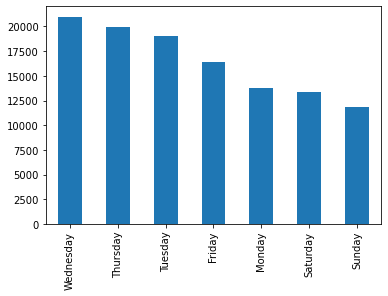

In [89]:
nypd_df['DAY_OF_THE_WEEK'].value_counts().plot(kind = 'bar')

In [98]:
nypd_df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'DAY_OF_THE_WEEK', 'PD_CD', 'PD_DESC',
       'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO',
       'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX',
       'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'New Georeferenced Column', 'MONTH', 'month'],
      dtype='object')

In [97]:
nypd_df['month'] = (nypd_df['ARREST_DATE'].dt.strftime('%B'))